In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/jkarki/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


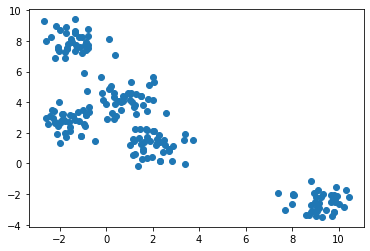

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=5,
                       cluster_std=0.70, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

## Implementation Algorithm

1. Choose k (num of clusters)
2. Choose k centers
3. Repeat until convergence:
    Find distance of each point
    Assign points to nearest centre
    Find new centers by mean of cluster points
4. Convergence = Centre doesn't change

In [3]:
X.shape

(200, 2)

In [4]:
# X[:,0]==X[:,1]

In [5]:
len(y_true)

200

In [6]:
# from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_argmin  #Directly finds the closest centre
from sklearn.metrics import pairwise_distances_argmin_min

In [7]:
k=5

np.random.seed(42)
center_indices=np.random.choice(len(X),5)
center_indices
centers=X[center_indices]
centers

array([[ 8.08458114, -2.06007329],
       [ 1.77304366,  1.75337521],
       [-0.76417865,  8.32178442],
       [ 0.50554777,  4.05210011],
       [ 7.98310652, -2.66575143]])

SSE 329.3538486183512
[[ 9.29515256 -2.06075149]
 [ 2.06716392  1.24737306]
 [-1.41526099  7.91396494]
 [-0.36660492  3.5243026 ]
 [ 9.06438456 -3.05080054]]


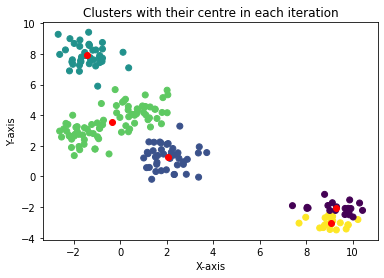

In [17]:
while True:
    #Find distance and assign points to nearest cluster
    cluster_assign, error=pairwise_distances_argmin_min(X,centers,metric='euclidean')
    print('SSE',np.sum(np.square(error)))
    
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=cluster_assign)
    plt.scatter(centers[:,0],centers[:,1],c='r')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Clusters with their centre in each iteration')
    
    #Find new centers by taking mean 
    new_centers=[]
    for i in range(k):
#         print('Cluster: ',i)
        cluster_points_index= (cluster_assign==i)
#         print(cluster_points_index)
        cluster_points=X[cluster_points_index]
        new_center = cluster_points.mean(axis=0)
        new_centers.append(new_center)
    
    new_centers = np.array(new_centers)
    
    print(new_centers)    
    
    if np.all(new_centers == centers):
        break
    
    centers=new_centers
    print('I am running')

In [40]:
cluster_assign[0]

1

## Implementing sklearn's KMeans

In [41]:
from sklearn.cluster import KMeans

In [42]:
kmeans=KMeans(n_clusters=5,random_state=1)
kmeans.fit(X)
print('Kmeans labelled dataset as:\n',kmeans.labels_)
print('*'*35,'\n')
print('The center of the clusters are:\n')
print(kmeans.cluster_centers_)
print('*'*35,'\n')
print('The error: \n')
print(kmeans.inertia_)

Kmeans labelled dataset as:
 [1 0 4 0 1 4 3 4 4 1 4 1 2 3 4 1 3 0 0 1 0 3 4 0 2 1 0 0 2 0 1 3 4 4 3 4 2
 0 1 4 3 4 4 1 2 2 2 1 1 0 4 1 0 1 2 2 3 0 2 1 2 2 3 4 3 2 4 1 1 2 2 1 2 4
 4 2 4 3 3 1 0 0 1 1 0 0 4 4 2 2 0 2 0 0 4 4 1 3 2 4 4 3 2 1 1 2 2 0 4 3 1
 4 2 0 3 1 3 4 3 3 2 4 2 3 4 3 4 0 4 3 3 4 0 1 0 2 4 3 2 2 1 2 3 3 0 1 1 0
 1 4 3 0 2 2 2 4 0 3 4 2 0 0 3 0 1 3 0 0 2 4 3 3 3 1 4 0 2 0 0 1 1 3 4 3 3
 4 3 4 0 0 2 1 1 1 1 1 2 2 3 0]
*********************************** 

The center of the clusters are:

[[-1.41526099  7.91396494]
 [ 2.05471556  1.1964141 ]
 [ 9.18553776 -2.53102479]
 [-1.63285306  2.74014779]
 [ 0.84885062  4.22809574]]
*********************************** 

The error: 

176.65505729396614


## Custom Class

In [55]:
class My_KMeans:
    def __init__(self, n_clusters, random_state):
        self.n_clusters=n_clusters
        self.random_state=random_state
        
    def fit(self,X):
        np.random.seed(self.random_state)
        center_indices=np.random.choice(X.shape[0],size=self.n_clusters)
        centers=X[center_indices]
        
        while True:
        #Find distance and assign points to nearest cluster
            cluster_assign,error=pairwise_distances_argmin_min(X,centers,metric='euclidean')
            print('SSE',np.sum(np.square(error)))
            
            plt.figure()
            plt.scatter(X[:,0],X[:,1],c=cluster_assign)
            plt.scatter(centers[:,0],centers[:,1],c='r')
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.title('Clusters with their centre in each iteration')

            #Find new centers by taking mean 
            new_centers=[]
            for i in range(self.n_clusters):
                cluster_points_index = (cluster_assign==i)
                cluster_points=X[cluster_points_index]
                new_center = cluster_points.mean(axis=0)
                new_centers.append(new_center)

            new_centers = np.array(new_centers)

            print(new_centers)    

            if np.all(new_centers == centers):
                break

            centers=new_centers
        
        self.labels_=cluster_assign
        self.cluster_centers_=centers
        
        return self

SSE 1028.3107098264154
[[-1.36406519  6.1247784 ]
 [ 1.0252966   2.45616581]
 [ 9.18553776 -2.53102479]]
SSE 765.2238789420365
[[-1.34486906  6.87465802]
 [ 0.69665991  2.55252007]
 [ 9.18553776 -2.53102479]]
SSE 682.1761395028482
[[-1.35130083  7.637026  ]
 [ 0.50550629  2.67320392]
 [ 9.18553776 -2.53102479]]
SSE 639.2027906636059
[[-1.38606241  7.85921774]
 [ 0.4706727   2.72178883]
 [ 9.18553776 -2.53102479]]
SSE 636.703820716427
[[-1.38606241  7.85921774]
 [ 0.4706727   2.72178883]
 [ 9.18553776 -2.53102479]]


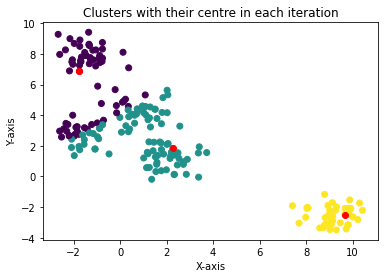

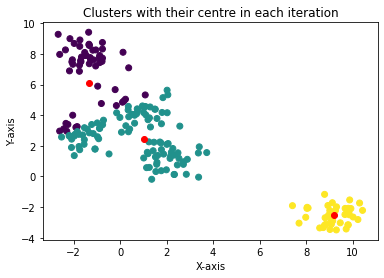

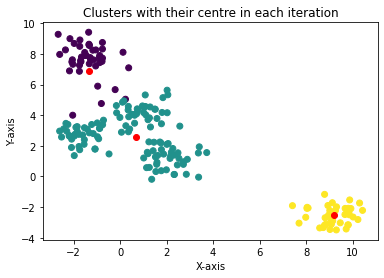

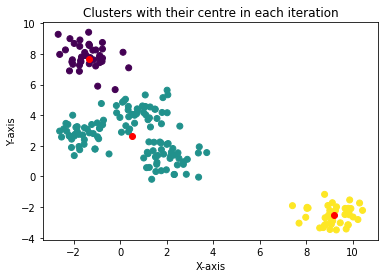

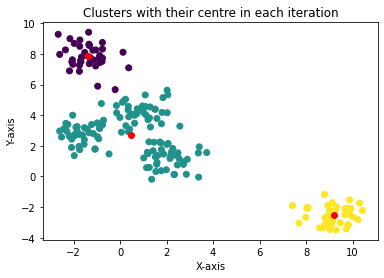

In [56]:
k2=My_KMeans(n_clusters=3,random_state=1)
k2.fit(X)

# Choosing K

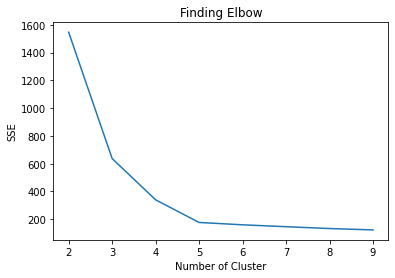

In [57]:
k_values=[]
k_inertia=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=1)
    kmeans.fit(X)
    k_values.append(k)
    k_inertia.append(kmeans.inertia_)
    
plt.title('Finding Elbow')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.plot(k_values,k_inertia)